# Data Visualization with Python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.table import Table
from datetime import datetime
from collections import Counter
from statistics import mode
from wordcloud import WordCloud
#(pip install wordcloud)
#(pip install Pillow)

## Introduction

In this workshop, we will visualize the historical weather data which covers 30 US and Canadian Cities, as well as 6 Israeli cities. Pandas package will be used to process the data into desired format ready for visualization using Matplotlib, and Wordcloud.
#### data source: https://www.kaggle.com/selfishgene/historical-hourly-weather-data#humidity.csv

## Section one: basic line chart, area chart, and subplots in Matplotlib

### Step 1: Read csv file 

####  Read csv into pandas dataframe and get basic idea about data
such as print out the first few rows of data, get basic statistics features

In [8]:
# read csv into pandas dataframe
city_attributes = pd.read_csv("../../../data/city_attributes.csv")

In [21]:
city_attributes.head(5)

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683


In [28]:
city_attributes['Latitude'].describe()

count    36.000000
mean     37.066743
std       5.815514
min      25.774269
25%      32.766126
50%      36.170429
75%      40.998211
max      49.249660
Name: Latitude, dtype: float64

In [4]:
city_name = list(city_attributes['City'])
print(city_name)

['Vancouver', 'Portland', 'San Francisco', 'Seattle', 'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque', 'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City', 'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis', 'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami', 'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal', 'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa', 'Nahariyya', 'Jerusalem']


In [5]:
temperature_df = pd.read_csv("../../../data/temperature.csv")
temperature_df.head(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


### Step 2: Transform temperature data
The original dataframe puts 36 cities name as column name. We want to transform the dataframe, so it will have 3 columns, one is `datetime`, second column is `city` which captures all city names from original dataframe's column name, and last one is `temperature`, which captures the actual temperature data.

datetime | Vancouver | Portland|....  =>  datetime | city | temperature

**pandas.melt()**: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

If you want to do anything with the latitude and longitude data, dataframe joinning is the way to go
<b>pandas.dataframe.merge()</b>: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

To transform date string into the datetime type:
<b>pandas.to_datetime()</b>: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
It is much easier to extract year, month, date, time from a datetime object.

To substitute each value in a Series with another value, use <b>map</b> function:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html

In [6]:
# transform column name in to a column of city name
temperature_data = pd.melt(temperature_df, id_vars=['datetime'],value_vars= city_name, var_name='City', value_name='temperature')
# left join latitude and longitude data
temperature_data = temperature_data.merge(city_attributes, how="left", on=['City'])
# remove empty row
temperature_data = temperature_data[temperature_data['temperature'].notna()]
# split date_time into two column for future aggregation
# date_time = temperature_data.loc[:, 'datetime'].str.split(expand=True)
# temperature_data.loc[:, 'date'] = date_time[0]
# temperature_data.loc[:, 'time'] = date_time[1]
temperature_data.loc[:, 'datetime'] = pd.to_datetime(temperature_data['datetime'])
temperature_data.loc[:, 'date'] = temperature_data.loc[:, 'datetime'].map(lambda x: x.strftime("%Y-%m-%d"))

# add year-month and year column for future aggregation => after group by, the datetime column will be gone, so do it later
temperature_data.loc[:, 'year_month'] = temperature_data.loc[:, 'datetime'].map(lambda x: x.strftime("%Y-%m"))
temperature_data.loc[:, 'year'] = temperature_data.loc[:, 'datetime'].map(lambda x: x.year)

In [7]:
temperature_data.head(5)

,datetime,City,temperature,Country,Latitude,Longitude,date,year_month,year
1,2012-10-01 13:00:00,Vancouver,284.630000,Canada,49.24966,-123.119339,2012-10-01,2012-10,2012
2,2012-10-01 14:00:00,Vancouver,284.629041,Canada,49.24966,-123.119339,2012-10-01,2012-10,2012
3,2012-10-01 15:00:00,Vancouver,284.626998,Canada,49.24966,-123.119339,2012-10-01,2012-10,2012
4,2012-10-01 16:00:00,Vancouver,284.624955,Canada,49.24966,-123.119339,2012-10-01,2012-10,2012
5,2012-10-01 17:00:00,Vancouver,284.622911,Canada,49.24966,-123.119339,2012-10-01,2012-10,2012


### Extra transformation
The dataframe contains hourly measurements data. To easily visualize it, we can aggregate it into daily measurements (or monthly, yearly, based on your needs)

<b>pandas.dataframe.groupby()</b>: https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.groupby.html

Aggregate on top of each group by <b>DataFrameGroupBy.agg()</b>: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html


In [8]:
## aggregate temperature by country, city, and date to get daily average, min, max temperature
daily_temperature_df = temperature_data.groupby(by=['Country','City','date']).agg({'temperature':[min,max,np.mean],'Latitude':np.mean,'Longitude':np.mean})
daily_temperature_df.columns = ['_'.join(x) for x in daily_temperature_df.columns.ravel()] #ravel, merge two layer of multiindex into meaning name
daily_temperature_df = daily_temperature_df.reset_index()
daily_temperature_df.rename(columns={'Latitude_mean':'Latitude', 'Longitude_mean': 'Longitude'}, inplace=True)
daily_temperature_df.head(5)

,Country,City,date,temperature_min,temperature_max,temperature_mean,Latitude,Longitude
0,Canada,Montreal,2012-10-01,285.830000,285.952906,285.887980,45.508839,-73.587807
1,Canada,Montreal,2012-10-02,285.966046,288.940000,286.937931,45.508839,-73.587807
2,Canada,Montreal,2012-10-03,283.750000,292.210000,287.374583,45.508839,-73.587807
3,Canada,Montreal,2012-10-04,282.830000,292.580000,286.860833,45.508839,-73.587807
4,Canada,Montreal,2012-10-05,285.040000,291.300000,287.535208,45.508839,-73.587807


## Step 3: Visualize Temeprature Data by Matplotlib

In [11]:
## temperature of one city: Vancouver
daily_temperature_vancouver_df = daily_temperature_df[daily_temperature_df['City']=='Vancouver']

### A simple Line Chart (daily average of one city's temperature)

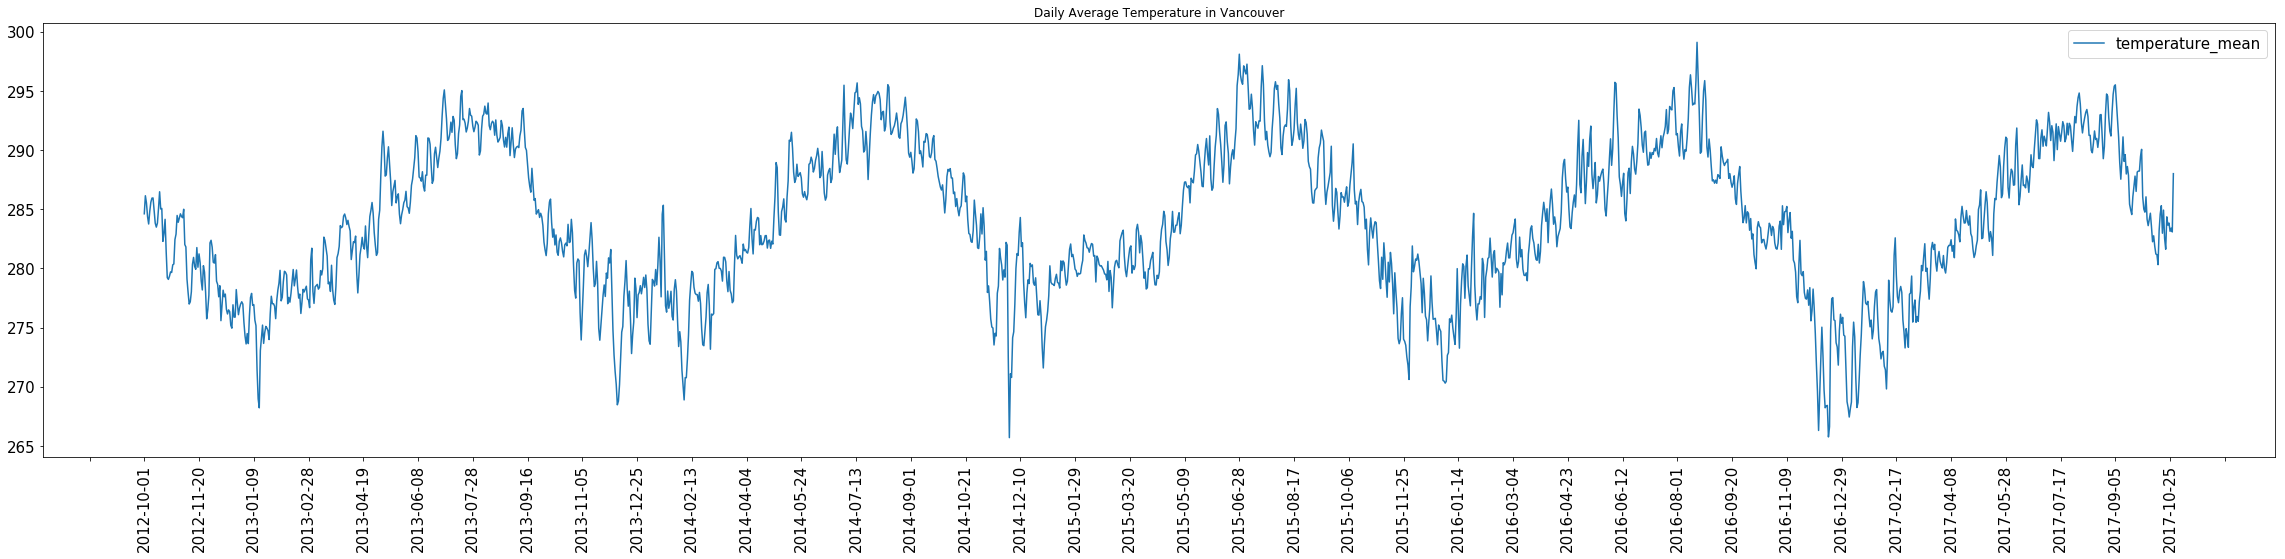

In [104]:
## visualize daily average of Vancouver's temperature
fig, ax = plt.subplots(figsize = (40,8))
plt.plot(daily_temperature_vancouver_df['date'],daily_temperature_vancouver_df['temperature_mean'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))  # show x ticks label every 50 data point, so roughly 1825/50=30-36
ax.tick_params(axis='both',labelsize=18)
#ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', rotation=90)
plt.legend(fontsize=18)
plt.title("Daily Average Temperature in Vancouver", fontsize=18)
plt.show()

### A Line chart on top of an Area Chart (daily average and range of one city's temperature)

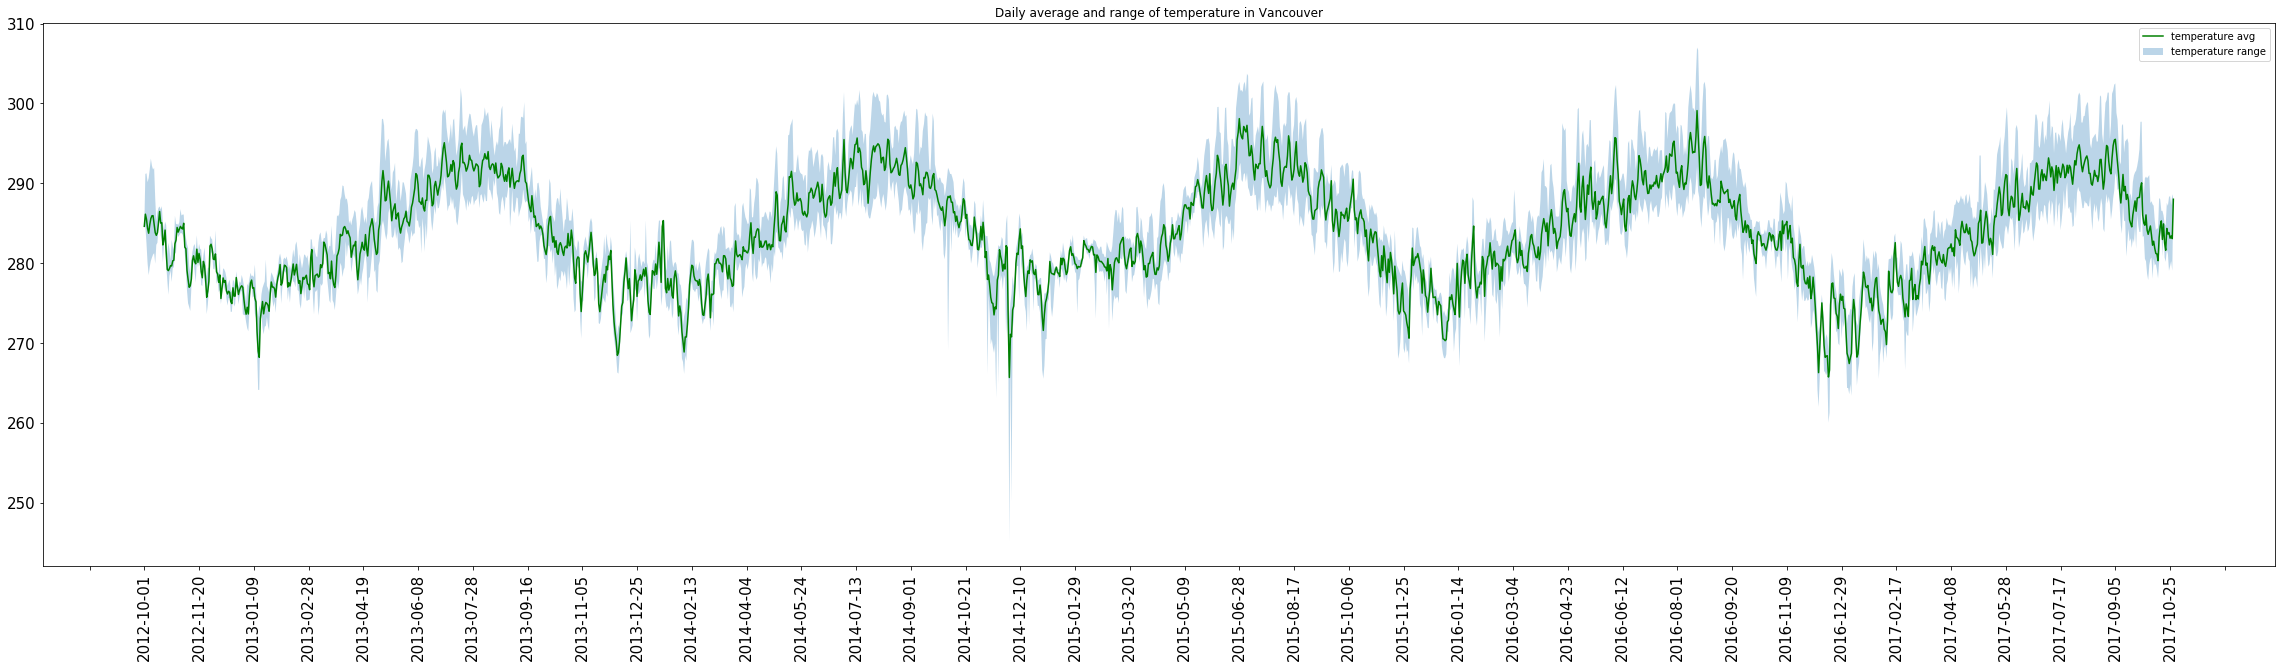

In [112]:
## visualize daily range and average of Vancouver's temperature
fig, ax = plt.subplots(figsize = (40,10))
plt.fill_between(daily_temperature_vancouver_df['date'], daily_temperature_vancouver_df['temperature_min'], daily_temperature_vancouver_df['temperature_max'], alpha=0.3, label='temperature range')
plt.plot(daily_temperature_vancouver_df['date'], daily_temperature_vancouver_df['temperature_mean'],c='green', label='temperature avg')
ax.xaxis.set_major_locator(ticker.MultipleLocator(50)) 
ax.tick_params(axis='both',labelsize=15)
ax.tick_params(axis='x',rotation=90)
plt.legend(fontsize=15, frameon=False, loc='lower right')
plt.title('Daily average and range of temperature in Vancouver', fontsize=18)
plt.show()

### A Series of Line Chart on top of an Area Chart (daily average and range for multiple cities' temperature)

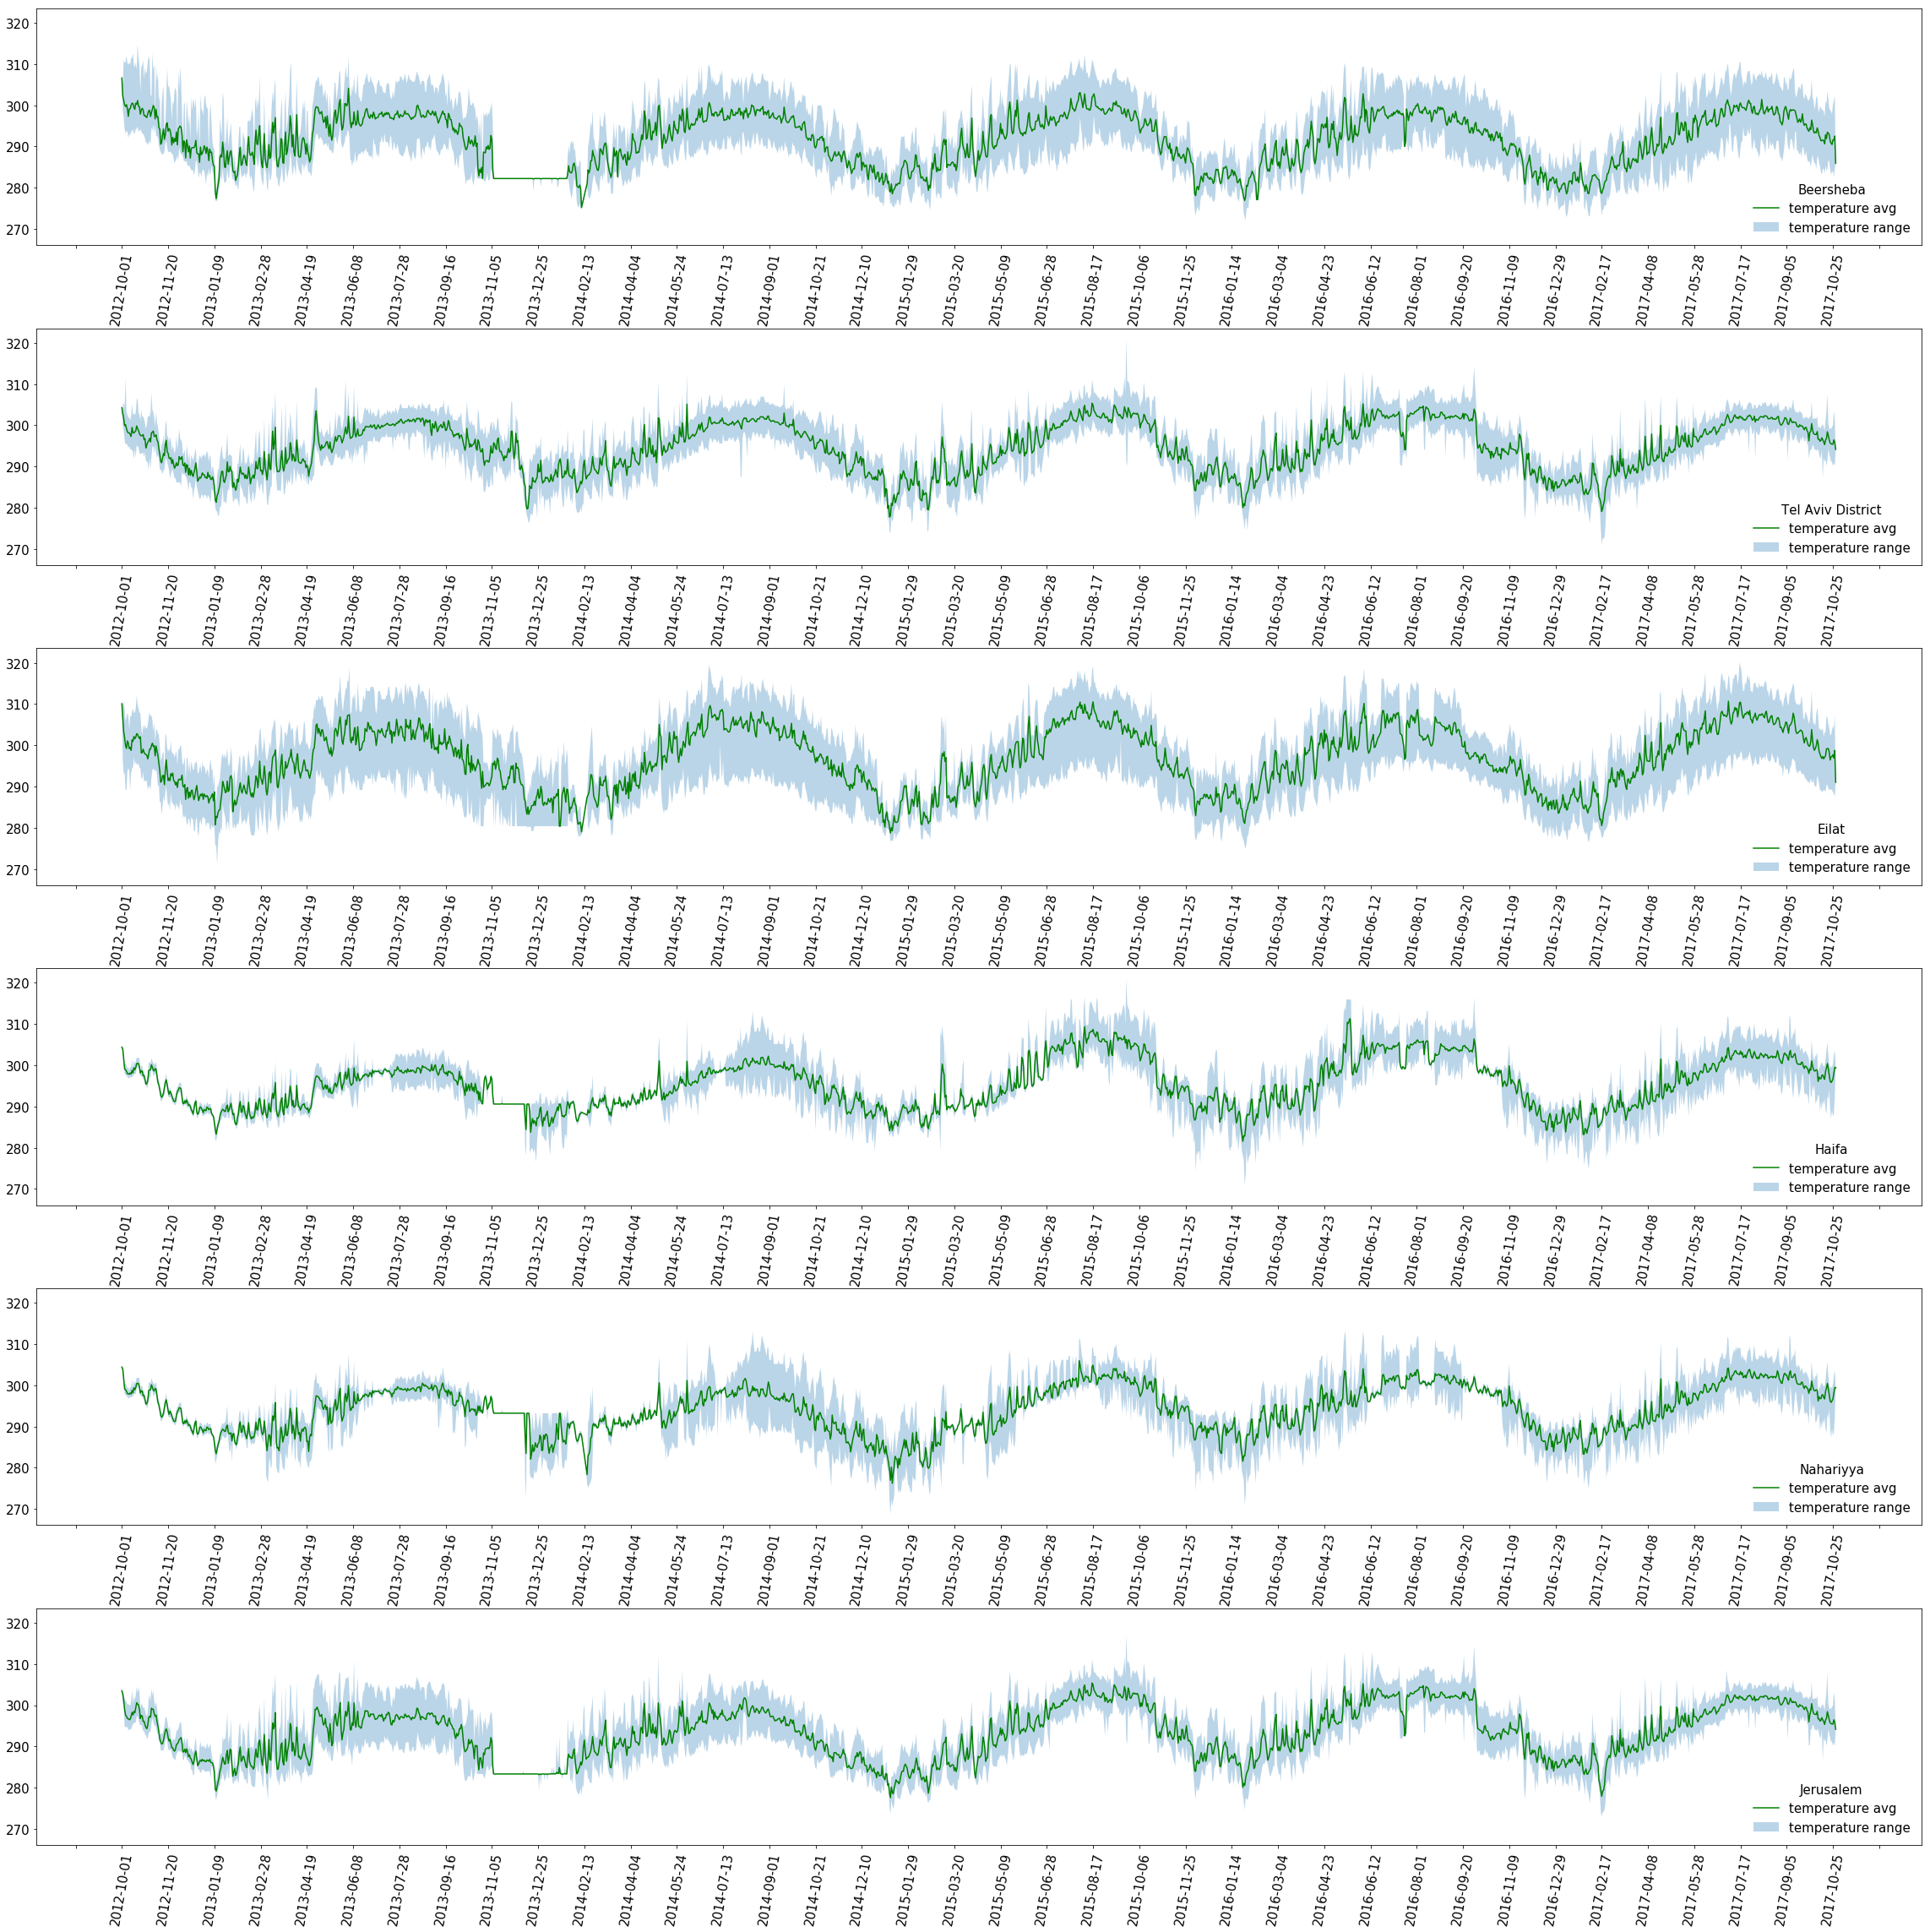

In [11]:
# using sub plots to compare several cities' daily temperature
some_cities = ['Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa', 'Nahariyya', 'Jerusalem'] # Israeli cities
# select cities based on different conditions:
# some_cities = city_attributes[(city_attributes['Latitude'] >=35) & (city_attributes['Latitude'] <=37)]['City']
fig, axes=plt.subplots(ncols=1, nrows=len(some_cities),sharey=True, figsize=(40, 40))
for index, city in enumerate(some_cities):
    temp_daily_temp_df = daily_temperature_df[daily_temperature_df['City']==city]
    axes[index].fill_between(temp_daily_temp_df['date'], temp_daily_temp_df['temperature_min'], temp_daily_temp_df['temperature_max'],alpha=0.3, label='temperature range')
    axes[index].plot(temp_daily_temp_df['date'], temp_daily_temp_df['temperature_mean'],c='green', label='temperature avg')
    axes[index].xaxis.set_major_locator(ticker.MultipleLocator(50)) 
    axes[index].tick_params(axis='both',labelsize=15)
    axes[index].tick_params(axis='x',rotation=80)
    axes[index].legend(title=city, fontsize=15, frameon=False, loc='lower right',title_fontsize=15)
plt.subplots_adjust(hspace=0.35)
plt.show()
# force the y axis to have same label =>sharey=True
# adjust the size between each subplots =>plt.subplots_adjust(hspace=0.35)
# add city as legend => plt.legend(title)


## Section 2: Bar Chart and Wordcloud for text data
text data is generally interesting to visualize and requires extra data transformation
Based on the simple statistics summary of the weather description data, we can see that the phrases used are limited. In this way, the **bar chart** can be a good candidate if you want to see how frequently each different phrase is applied. Also, **wordcloud** is a good chioce for presentation.

In the appendix, there is another type of grid chart that show text data in time series way

### Step 1: Read csv file 

In [3]:
weather_description = pd.read_csv("../../../data/weather_description.csv")
weather_description.head(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,haze,NaN,NaN,NaN
1,2012-10-01 13:00:00,mist,scattered clouds,light rain,sky is clear,mist,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,overcast clouds,sky is clear,sky is clear,sky is clear,haze,sky is clear,sky is clear,sky is clear
2,2012-10-01 14:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,sky is clear,sky is clear,broken clouds,overcast clouds,sky is clear,overcast clouds
3,2012-10-01 15:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
4,2012-10-01 16:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds


In [5]:
print(weather_description.describe())

                   datetime     Vancouver      Portland San Francisco  \
count                 45253         44460         45252         44460   
unique                45253            37            24            28   
top     2014-03-27 01:00:00  sky is clear  sky is clear  sky is clear   
freq                      1         12805         11725         12654   

             Seattle   Los Angeles     San Diego     Las Vegas       Phoenix  \
count          45252         45252         45252         45252         45252   
unique            29            25            22            23            26   
top     sky is clear  sky is clear  sky is clear  sky is clear  sky is clear   
freq           12801         26136         14829         35090         30303   

         Albuquerque      ...       Philadelphia      New York       Montreal  \
count          45252      ...              45252         44460          45252   
unique            37      ...                 30            36         

### Step 2: Transform data

In [8]:
# melt
weather_desc_df = pd.melt(weather_description, id_vars=['datetime'], value_vars=city_name, var_name='City', value_name='description')
# clean na
weather_desc_df = weather_desc_df[weather_desc_df['description'].notna()]

,datetime,City,description
1,2012-10-01 13:00:00,Vancouver,mist
2,2012-10-01 14:00:00,Vancouver,broken clouds
3,2012-10-01 15:00:00,Vancouver,broken clouds
4,2012-10-01 16:00:00,Vancouver,broken clouds
5,2012-10-01 17:00:00,Vancouver,broken clouds


In [9]:
# see how many unique phase is used
weather_desc_df['description'].unique()

array(['mist', 'broken clouds', 'sky is clear', 'light rain',
       'few clouds', 'fog', 'overcast clouds',
       'light intensity shower rain', 'moderate rain',
       'light intensity drizzle', 'scattered clouds',
       'proximity shower rain', 'heavy intensity rain', 'heavy snow',
       'shower rain', 'snow', 'heavy shower snow',
       'light intensity drizzle rain', 'light snow', 'very heavy rain',
       'smoke', 'thunderstorm with heavy rain', 'light shower snow',
       'thunderstorm', 'thunderstorm with light rain', 'haze', 'dust',
       'volcanic ash', 'heavy intensity shower rain',
       'thunderstorm with rain', 'sleet', 'light rain and snow',
       'drizzle', 'shower snow', 'light shower sleet',
       'proximity thunderstorm', 'ragged thunderstorm', 'freezing rain',
       'heavy intensity drizzle', 'proximity thunderstorm with rain',
       'squalls', 'proximity sand/dust whirls', 'proximity moderate rain',
       'sand', 'sand/dust whirls', 'proximity thunderstor

In [173]:
#weather_desc_df[weather_desc_df['City']=='Vancouver'].loc[:,'description'].unique()

## Step 3a: Create a bar chart for a single city's weather description data
to show what is the most frequent weather situations for Vancouver

return a Series containing counts of unique values

**pandas.series.value_counts()**: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

In [174]:
# single city's description count
vancouver_desc_count_df = weather_desc_df[weather_desc_df['City']=='Vancouver'].loc[:,'description'].value_counts()
vancouver_desc_count_df.head(5)

sky is clear       12805
light rain          5569
overcast clouds     4676
broken clouds       4489
mist                3588
Name: description, dtype: int64

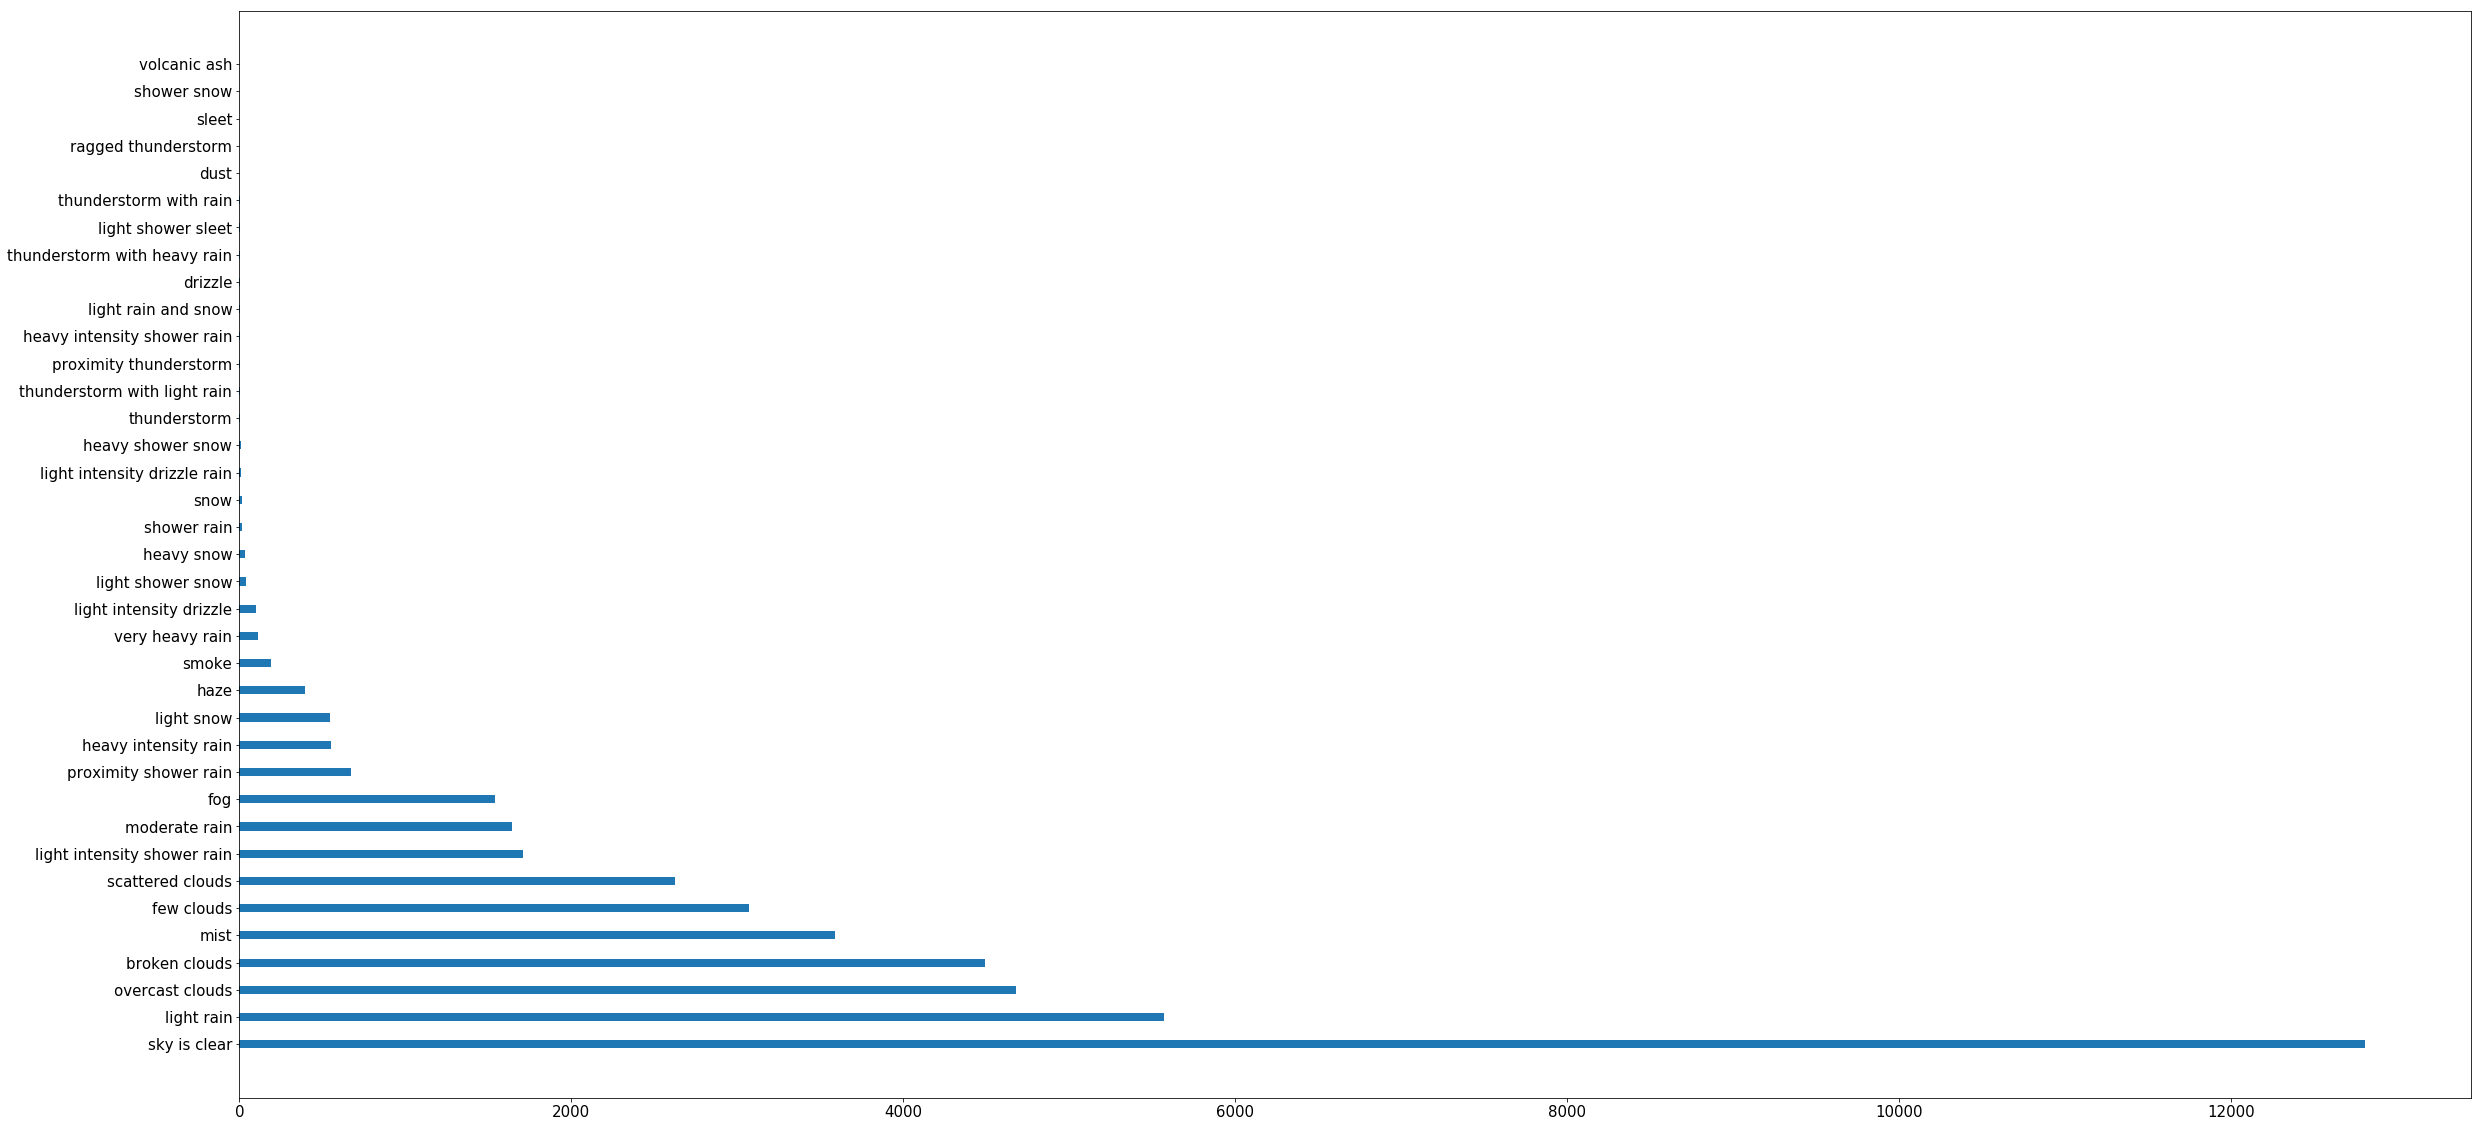

In [23]:
# draw a horizontal bar chart
fig, ax = plt.subplots(figsize = (40,20))
plt.barh(vancouver_desc_count_df.index, vancouver_desc_count_df.values, height=0.3)
ax.tick_params(axis='both',labelsize=15)
plt.show()

## Step 3b: Create a wordcloud to visualize a single city's weather description 

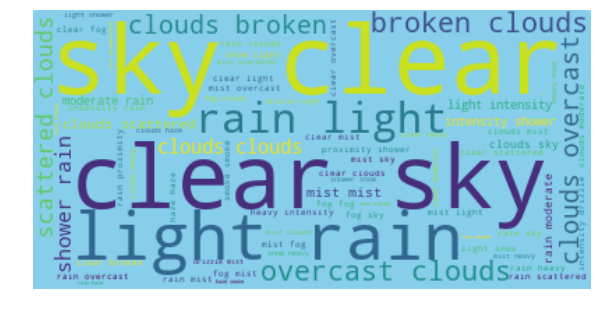

In [36]:
# wordcloud for a single city
# connect words in phrase by ~, to make sure wordcloud draw charts based on phrase not single words
# but will produce word cloud that having duplicate phrase
vancouver_wordcloud_df = weather_desc_df[weather_desc_df['City']=='Vancouver'].copy() # return a copy of a slice
vancouver_wordcloud_df.loc[:,'description'] = vancouver_wordcloud_df.loc[:,'description'].map(lambda x: '~'.join(x.split()))

# wordcloud expects a list of strings
text = ' '.join(list(vancouver_wordcloud_df.loc[:,'description']))            
vancouver_wordcloud = WordCloud(background_color="skyblue").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(vancouver_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

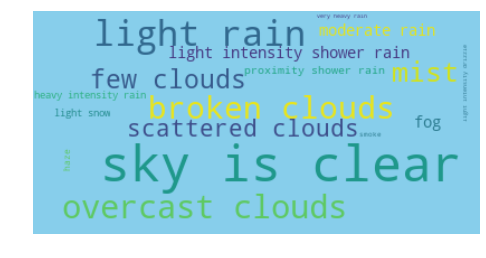

In [35]:
# to ovoid duplicate phrase, using WordCloud.generate_from_frequencies()
# which expects a dictionary, with strings as key, frequency number as values
vancouver_desc_count_dict = vancouver_desc_count_df.to_dict()
vancouver_wordcloud = WordCloud(background_color="skyblue").generate_from_frequencies(vancouver_desc_count_dict)
plt.figure(figsize=(8,8))
plt.imshow(vancouver_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Appendix
- some test code example
- an extra grid chart of considering time into weather description

In [ ]:
## extra: grid chart of considering time into weather description

# transform datetime to datetime type, add'year_month' column
weather_desc_df.loc[:, 'datetime'] = pd.to_datetime(weather_desc_df['datetime'])
weather_desc_df.loc[:, 'year_month'] = weather_desc_df.loc[:, 'datetime'].map(lambda x: x.strftime("%Y-%m"))
# group by year_month, get the most frequently appeared phrase
# new df, index is different description phrase, column is year-month, value is 1-0
# draw table with color

#### How to transform dataframe
**from**

`date  | desc   to     2012 |  2013
2012      a         a   1       0
2013      b         b   0       1
`

In [99]:
a = pd.DataFrame({'date':['2012-10', '2012-11','2012-12'],'desc':['sky is clear','raining','raining heavily']})
a

,date,desc
0,2012-10,sky is clear
1,2012-11,raining
2,2012-12,raining heavily


In [100]:
b= a.pivot_table(columns='date',index='desc', values='date',aggfunc=lambda x:x.count(),fill_value=0)
b

date,2012-10,2012-11,2012-12
desc,,,
raining,0,1,0
raining heavily,0,0,1
sky is clear,1,0,0


In [103]:
b.columns

Index(['2012-10', '2012-11', '2012-12'], dtype='object', name='date')

#### How to retrieve the most frequent weather description on top of groupby

In [125]:
# get the most frequesnt desc. or agg({'description: lambda x: mode(x)}) => slower then counter. 
monthly_weather_desc_df = weather_desc_df.groupby(by=['City','year_month']).agg({'description':lambda x: Counter(x).most_common(1)[0][0]})
monthly_weather_desc_df.reset_index(inplace=True)

,City,year_month,description
0,Albuquerque,2012-10,sky is clear
1,Albuquerque,2012-11,sky is clear
2,Albuquerque,2012-12,sky is clear
3,Albuquerque,2013-01,sky is clear
4,Albuquerque,2013-02,sky is clear


In [134]:
# new df of a single city, index is different description phrase, column is year-month, value is 1-0
Vancouver_weather_desc_matrix = monthly_weather_desc_df[monthly_weather_desc_df['City']=='Vancouver'][['year_month','description']]
monthly_weather_desc_matrix = Vancouver_weather_desc_matrix.pivot_table(columns='year_month',index='description', 
                                                                  values='year_month',aggfunc=lambda x:x.count(),
                                                                  fill_value=0)


year_month,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
description,,,,,,,,,,,,,,,,,,,,,
broken clouds,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
few clouds,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
light rain,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mist,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
moderate rain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Draw a grid chart using matplotlib.table.Table
the x axis is time. 
the y axis is different weather description

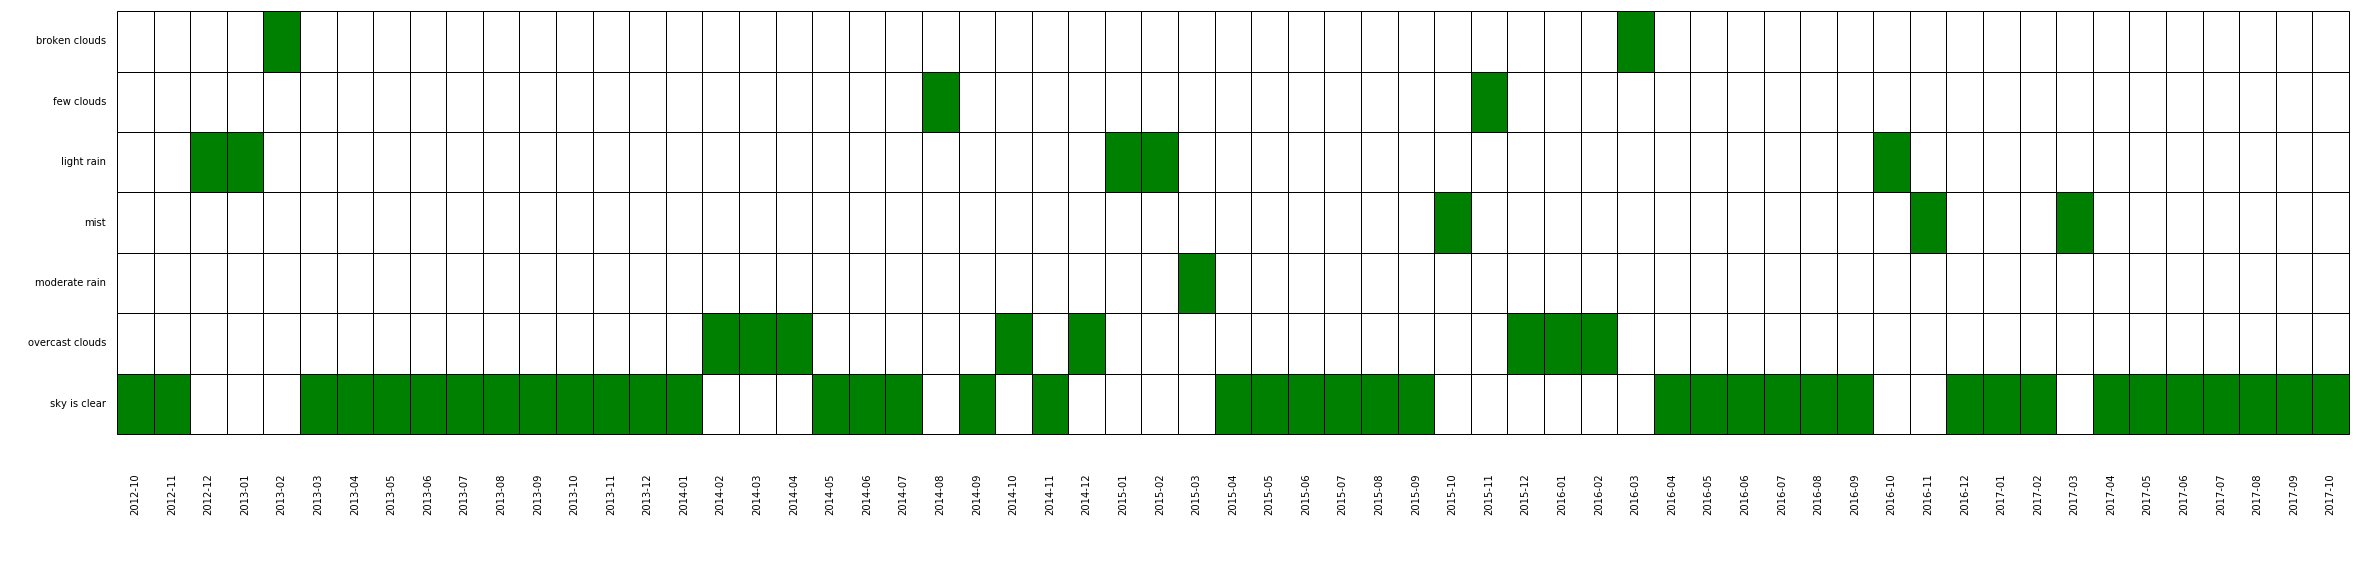

In [176]:
# draw table with color
fig, ax=plt.subplots(figsize=(40,10))
ax.set_axis_off()
bk_color = ['white', 'green']
tb = Table(ax, bbox=[0,0,1,1])
tb.set_fontsize(30)
nrows, ncols = monthly_weather_desc_matrix.shape
width, height = 1.0/ncols, 1.0/nrows
# add cells
for (i,j), val in np.ndenumerate(monthly_weather_desc_matrix):
    color = bk_color[val]
    tb.add_cell(i, j, width, height, loc='center', facecolor=color)
    
# add row label:
for i, label in enumerate(monthly_weather_desc_matrix.index):
    tb.add_cell(i, -1, width*3, height, text=label, loc='right', 
                edgecolor='none', facecolor='none')

# add column label:
for j, label in enumerate(monthly_weather_desc_matrix.columns):
    cell = tb.add_cell(nrows, j,width, height*2, text=label, loc='center',
               edgecolor='none',facecolor='none')
    cell.get_text().set_rotation(90)
    
ax.add_table(tb)    
plt.show()

#### Compare two ways to retrieving the most frequent string from grouped by dataframe

In [105]:
c=pd.DataFrame({'date':['2012-10','2012-10','2012-10','2012-11','2012-11','2012-11'],
               'desc':['raining', 'raining','cloudy','sunny day', 'raining','sunny day']})
c

,date,desc
0,2012-10,raining
1,2012-10,raining
2,2012-10,cloudy
3,2012-11,sunny day
4,2012-11,raining
5,2012-11,sunny day


In [114]:
from collections import Counter
c.groupby(by='date').agg({'desc':lambda x: Counter(x).most_common(1)[0][0]})

,desc
date,
2012-10,raining
2012-11,sunny day


In [115]:
from statistics import mode 
a_list=['raining','raining','sunny']
mode(a_list)
# Counter(a_list).most_common(1)[0][0]

'raining'

In [122]:
import timeit
def counter_way():
    a_list=['raining','raining','sunny']
    return Counter(a_list).most_common(1)[0][0]
def mode_way():
    a_list=['raining','raining','sunny']
    return mode(a_list)
# if __name__ == '__main__':
#     import timeit
#     print(timeit.timeit("counter_way()", setup="from __main__ import counter_way"))
#     print(timeit.timeit("mode_way()", setup="from __main__ import mode_way"))
print('one',timeit.timeit("Counter(['raining','raining','sunny']).most_common(1)[0][0]", setup="from collections import Counter"))
print('two', timeit.timeit("mode(['raining','raining','sunny'])", setup="from statistics import mode"))


one 5.197855296079069
two 6.3839432031381875
